In [26]:
# SQL-challenge BONUS
# Employee Database
# By: Jack Cohen

# Import Dependencies

import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from config import pwd


In [ ]:
# Connect to Database

conn = psycopg2.connect(
    host="localhost",
    database="employee_db",
    user="postgres",
    password=pwd)

In [27]:
# Query Employee Data

emp = pd.read_sql('SELECT * FROM "Employees"',conn)
emp

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


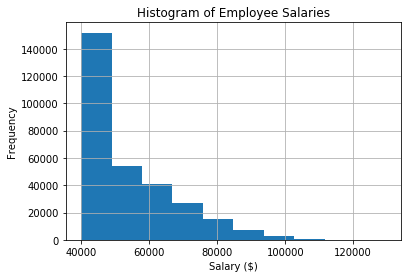

In [45]:
# Histogram of salary ranges for employees

salaries = pd.read_sql('SELECT * FROM "Salaries"',conn)
salary_count = salaries['salary'].value_counts()
sal = salaries.hist('salary');
for ax in sal.flatten():
    ax.set_xlabel("Salary ($)")
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of Employee Salaries")